In [36]:
import matplotlib.pyplot as plt
from strategy import (
    staking,
    bonding_with_restake
)


In [37]:
rebase_rate = 0.6203  # %
bond_discount = 6.24  # %
principal = 10000  # $
price = 8700  # $
roi_5d = (1+rebase_rate/100)**(3*5) - 1
apy = (1+rebase_rate/100)**(3*365) - 1


In [38]:
print(f'bond discount = {bond_discount/100:,.2%}')
print(f'       roi 5d = {roi_5d:,.2%}')
print(f'          apy = {apy:,.0%}')


bond discount = 6.24%
       roi 5d = 9.72%
          apy = 87,145%


In [39]:
def restaking_strategy(schedule=None):
    return bonding_with_restake(principal, price,
                                restake_schedule=schedule,
                                rebase_rate=rebase_rate, bond_discount=bond_discount, fee=0.0)


strategies = {
    'Just staking': staking(principal, price, rebase_rate=rebase_rate),
    'Bonding with perfect restaking': restaking_strategy(),
    'Restake once per day': restaking_strategy(
        [False, True, False]*5),
    'Restaked once in day 2 and day 4 each': restaking_strategy(
        [i in (4,10) for i in range(15)]),
    'Restake once in day 3': restaking_strategy(
        [False]*7 + [True] + [False]*7,),
}


In [40]:
for name, result in strategies.items():
    print(f'{name:>40}: roi 5d = {result.roi:<9.4%}, apy = {result.apy:<10,.0%}')


                            Just staking: roi 5d = 9.7196%  , apy = 87,145%   
          Bonding with perfect restaking: roi 5d = 11.6678% , apy = 315,210%  
                    Restake once per day: roi 5d = 11.0259% , apy = 206,897%  
   Restaked once in day 2 and day 4 each: roi 5d = 10.0672% , apy = 109,806%  
                   Restake once in day 3: roi 5d = 9.1136%  , apy = 58,130%   


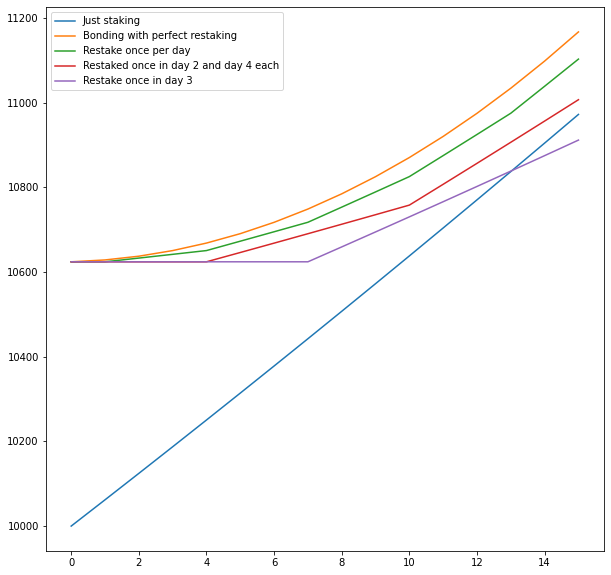

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for name, result in strategies.items():
    ax.plot([v.value for v in result.balance], label=name)
ax.legend()
